# Example ABCD_ML notebook on videogaming

# Init Phase

In [1]:
import ABCD_ML

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Define file locations used in notebook as short variables

In [2]:
data_dr = '/mnt/sdb2/'
dr1 = data_dr + 'ABCD2p0NDA/'
dr2 = data_dr + 'ABCDFixRelease2p0p1/'
dr3 = data_dr + '2.0_ABCD_Data_Explorer/2.0_NDA_Data/'

target_loc = dr1 + 'abcd_stq01.txt'
name_map_loc = dr2 + 'Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv'

mid_loc1 = dr2 + 'abcd_midabwdp01.txt'
mid_loc2 = dr2 + 'abcd_midabwdp202.txt'

sst_loc1 = dr2 + 'abcd_tfsstabwdp101.txt'
sst_loc2 = dr2 + 'abcd_tfsstabwdp201.txt'

nback_loc1 = dr2 + 'abcd_tfabwdp101.txt'
nback_loc2 = dr2 + 'abcd_tfabwdp201.txt'

strat_loc = dr3 + 'Other Non-Imaging/ABCD ACS Post Stratification Weights.csv'

### Define the main class object

In [3]:
ML = ABCD_ML.ABCD_ML(exp_name = 'video_games',
                     existing_log = 'overwrite',
                     random_state = 1)

exp_name = video_games
log_dr = /home/sage/ABCD_ML/Examples
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/video_games
log file at: /home/sage/ABCD_ML/Examples/video_games/logs.txt
notebook = True
default subject id col = src_subject_id
eventname = baseline_year_1_arm_1
use default subject ids = True
default dataset type = basic
default NaN values = ['777', '999']
low memory mode = False
random state = 1


ABCD_ML object initialized


# Data Loading Phase

### Load name map to convert between nda name and deap name

In [4]:
ML.Load_Name_Map(loc = name_map_loc,
                 dataset_type = 'explorer',
                 source_name_col = 'nda_name',
                 target_name_col = 'deap_name')

Loading /mnt/sdb2/ABCDFixRelease2p0p1/Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv assumed to be dataset type: explorer
Loaded map file


### Load the target variable

Extra steps~

screen3_wkdy_y = weekday
screen9_wknd_y = weekend

- 0 = None; .25 = < 30 minutes;
- 0.5 = 30 minutes;
- 1 = 1 hour;
- 2 = 2 hours;
- 3 = 3 hours;
- 4 = 4+ hours

In [5]:
ML.Load_Targets(loc = target_loc,
                col_name = ['screen3_wkdy_y', 'screen9_wknd_y'],
                data_type = ['o', 'o'])

copy = ML.targets.copy()
ML.Clear_Targets()

Loading /mnt/sdb2/ABCD2p0NDA/abcd_stq01.txt assumed to be dataset type: basic
4951 subjects dropped for eventname
Dropped 0 cols for all missing values
Dropped 37 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0
loading: screen3_wkdy_y
loading: screen9_wknd_y
Final shape:  (11838, 2)

Total valid overlapping subjects = 11838

All loaded targets
0 : screen3_wkdy_y
1 : screen9_wknd_y
cleared targets.


In [6]:
copy['screen3_wkdy_y'] = copy['screen3_wkdy_y'] * 5
copy['screen9_wknd_y'] = copy['screen9_wknd_y'] * 2

summed = copy['screen3_wkdy_y'] + copy['screen9_wknd_y']

# Put back in targets
ML.targets = summed.to_frame(name='gaming_hours')
ML.targets_keys.append('gaming_hours')

-- gaming_hours --


,gaming_hours
count,11838.000000
mean,7.097166
std,7.752232
min,0.000000
25%,1.750000
50%,4.000000
75%,9.000000
max,28.000000


Num. of unique vals: 44



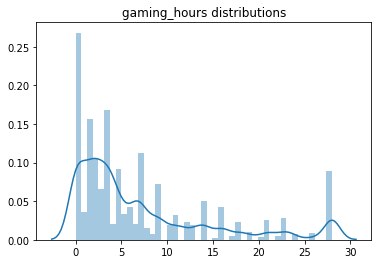

In [7]:
ML.Show_Targets_Dist()

In [8]:
ML.Binarize_Target(lower=1, upper=20)

Binarizing gaming_hours
Keeping: 1208 as 1.
Keeping: 1976 as 0.

Total valid overlapping subjects = 3184



-- gaming_hours --


,Original Name,Counts,Frequency
Internal Name,,,
0.0,<1,1976,0.620603
1.0,>20,1208,0.379397


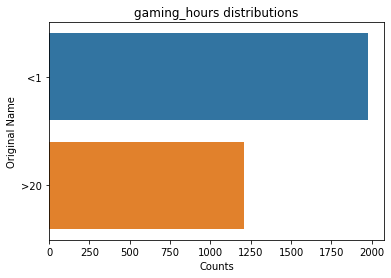

In [9]:
ML.Show_Targets_Dist()

### Load in all nback, sst and mid rois, all contrasts

In [10]:
ML.Load_Data(loc = [nback_loc1, nback_loc2, mid_loc1, mid_loc2, sst_loc1, sst_loc2])

ML.Show_Data_Dist(plot_type = 'hist')

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_midabwdp01_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp202.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd

### Re-load data with w/ winsorization at .2%

In [11]:
ML.Load_Data(loc = [nback_loc1, nback_loc2, mid_loc1, mid_loc2, sst_loc1, sst_loc2],
             winsorize_val = .002,
             clear_existing=True)
ML.Show_Data_Dist(plot_type = 'hist')

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp101.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_tfabwdp201.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_tfabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_midabwdp01_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp202.txt assumed to be dataset type: basic
dropped [

In [12]:
ML.data.head()

,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.frontomargin.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.occipital.inf.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.paracentral.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.subcentral.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.transv.frontopol.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.cingul.ant.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.cingul.mid.ant.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.and.s.cingul.mid.post.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.cingul.post.dorsal.lh,tfmri_nback_all_0.back_beta_cort.destrieux_g.cingul.post.ventral.lh,...,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.parieto.occipital.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.pericallosal.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.postcentral.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.precentral.inf.part.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.precentral.sup.part.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.suborbital.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.subparietal.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.temporal.inf.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.temporal.sup.rh,tfmri_sst_all_incorrect.go.vs.incorrect.stop_beta_cort.destrieux_s.temporal.transverse.rh
src_subject_id,,,,,,,,,,,,,,,,,,,,,
NDAR_INVBHD2GF0Z,0.166712,0.718340,0.080935,-0.015319,-0.026459,-0.247290,0.237306,-0.052828,-0.000740,-0.387652,...,-0.212851,-0.295629,-0.072879,-0.307763,-0.135112,-0.677116,-0.260126,-0.246651,-0.168505,-0.053524
NDAR_INVNZ90MJVP,-0.269582,0.141209,-0.375319,-0.717648,0.550969,-1.010384,-0.581872,-0.711401,-0.630276,-1.974274,...,-0.051251,-0.346650,-0.014239,-0.058560,-0.097879,-0.057843,-0.031458,-0.175272,-0.039946,0.013226
NDAR_INVVKF7FYHA,-0.446821,1.123836,0.320305,0.111021,-0.131924,-0.137053,-0.070451,0.019815,0.002165,0.043699,...,0.158032,0.116527,0.229596,0.204141,0.166194,0.395896,0.155194,0.485508,0.119888,0.303103
NDAR_INVTBTBAM4J,0.302028,1.052801,-0.049145,-0.068919,-0.486553,-0.177180,-0.009593,-0.086402,-0.246246,-0.239738,...,-0.000820,-0.112607,0.105062,-0.043454,0.172421,-0.132353,-0.327024,-0.278222,-0.128899,0.113782
NDAR_INVTHZ39BBJ,0.262961,0.419589,0.247852,-0.192949,0.514429,-0.522326,-0.263510,-0.137301,0.098565,-0.379302,...,-0.045675,-0.049305,0.076910,0.062548,0.101588,0.372029,-0.010256,0.120509,0.038251,0.014505


In [13]:
ML.Show_Data_Dist(num_feats=20)

### Load in "Strat" values

In [14]:
ML.Load_Strat(loc=mid_loc1,
              col_names='sex',
              binary_col_inds=0)

ML.Load_Strat(loc=strat_loc,
              col_names='rel_family_id',
              dataset_type='explorer')

Reading strat/stratification values!
Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_midabwdp01.txt assumed to be dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0

Total valid overlapping subjects = 2050

Removing non overlapping subjects
Reading strat/stratification values!
Loading /mnt/sdb2/2.0_ABCD_Data_Explorer/2.0_NDA_Data/Other Non-Imaging/ABCD ACS Post Stratification Weights.csv assumed to be dataset type: explorer
Dropped 0 cols for all missing values
Dropped 2 rows for missing values, based on the provided drop_nan param: True with actual nan_thresh: 0
Loaded rows with NaN remaining: 0
Merged with existing!
New combined shape: (2050, 2)

Total valid overlapping subjects = 2050

Removing non overlapping subjects


# Validation Phase

### Define the strategy to use across train test and k-fold splits

In [15]:
ML.Define_Validation_Strategy(groups=['rel_family_id'])

CV defined with group preserving over 1959 unique values.


### Perform a global train test split

In [16]:
ML.Train_Test_Split(test_size = .2)

Final data (w/ target) for modeling loaded shape: (2050, 3851)
Performed train/test split, train size: 1632 test size:  418


# Modeling Phase

### Set default re-usable parameters

#### Note: feats_to_use = '_sst_' means we will use only SST data

In [17]:
ML.Set_Default_ML_Params(problem_type = 'binary',
                         metric = ['matthews', 'macro roc auc', 'balanced accuracy', 'f1'],
                         scaler = 'robust',
                         scaler_scope = 'all',
                         splits = 3,
                         n_repeats = 2,
                         feats_to_use = '_sst_',
                         search_type = 'random',
                         search_splits = 3,
                         search_n_iter = 50,
                         n_jobs = 8)

No default target passed, set to 0.
No default model type passed, set to linear.
No default imputer passed, set to [mean, median]
No default imputer scope passed, set to [float, categorical]
No default sampler passed, set to None
No default sample on passed, set to targets
No default feat selector passed, set to None
No default ensemble type passed, set to basic ensemble
No default ensemble split passed, set to .2
No default model param ind passed, set to 0
No default imputer scaler params passed, set to 0
No default data scaler params passed, set to 0
No default sampler params passed, set to 0
No default feat selector params passed, set to 0
No default ensemble type params passed, set to 0
No default subjects_to_use passed, set to all
No default compute_train_score passed, set to False
No default random state passed, using class random state value of 1
No default calc_base_feature_importances passed, set to True
No default calc_shap_feature_importances passed, set to False
No default 

### Elastic-net w/ random parameter search & univariate feature selection filter

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'elastic net logistic',
                                    model_params = 1,
                                    search_n_iter = 14,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0)

### Class balanced bagging ensemble of light gradient boosting machines w/ feat. selection

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0,
                                    ensemble = 'balanced bagging',
                                    ensemble_params = 0)

### Non-linear rbf kernel SVM

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'svm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 1)

### Light gradient boosting machine w/ examples of feature importance output

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    calc_shap_feature_importances = True)

In [ ]:
ML.Plot_Base_Feat_Importances(top_n = 10)
ML.Plot_Shap_Feat_Importances(top_n = 10)
ML.Plot_Shap_Summary(top_n = 10)

In [ ]:
ML.Set_Default_ML_Params(feats_to_use = 'all')

raw_scores, raw_preds = ML.Evaluate(model = 'elastic net logistic',
                                    model_params = 1,
                                    search_n_iter = 14,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0)

raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 0,
                                    ensemble = 'balanced bagging',
                                    ensemble_params = 0)

raw_scores, raw_preds = ML.Evaluate(model = 'svm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 1)

raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    calc_shap_feature_importances = True)

In [18]:
ML.Set_Default_ML_Params(feats_to_use = 'all')

Default params set.



In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    calc_shap_feature_importances = True)

ML.Plot_Base_Feat_Importances(top_n = 10)
ML.Plot_Shap_Feat_Importances(top_n = 10)
ML.Plot_Shap_Summary(top_n = 10)

Setting default ML verbosity settings!
Note, if the following values are not desired, call self.Set_ML_Verbosity()

Running Evaluate with:
problem_type = binary
model = light gbm
model_params = 1
metric = ['matthews', 'macro roc auc', 'balanced accuracy', 'f1']
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = univariate selection
feat_selector_params = 1
splits = 3
n_repeats = 2
search_type = random
search_splits = 3
search_n_iter = 50
n_jobs = 7
feats_to_use = _sst_
subjects_to_use = ('sex', 0)
compute_train_score = False
random_state = 1
calc_base_feature_importances = True
calc_shap_feature_importances = True
extra_params = {}

Saving scores and settings with unique name: light gbm

subjects_to_use set to: sex=0,




Validation Scores
_________________
Metric:  matthews
Mean Validation score:  0.04729526227922565
Macro Std in Validation score:  0.002013523743589596
Micro Std in Validation score:  0.04483705189072966

Metric:  macro roc auc
Mean Validation score:  0.5526160677920591
Macro Std in Validation score:  0.02156029597307413
Micro Std in Validation score:  0.03822013201909591

Metric:  balanced accuracy
Mean Validation score:  0.5370120003401185
Macro Std in Validation score:  0.004806661598999229
Micro Std in Validation score:  0.026501249625268956

Metric:  f1
Mean Validation score:  0.1884799856294948
Macro Std in Validation score:  0.02728777151757264
Micro Std in Validation score:  0.08838080341568016



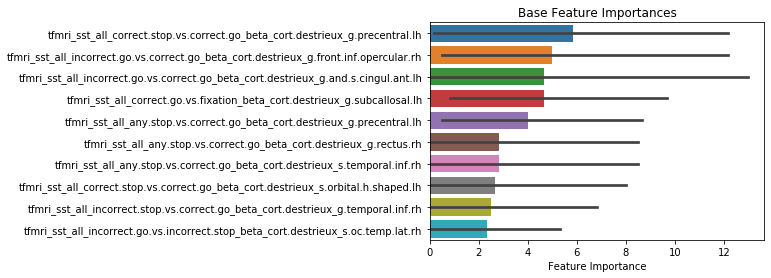

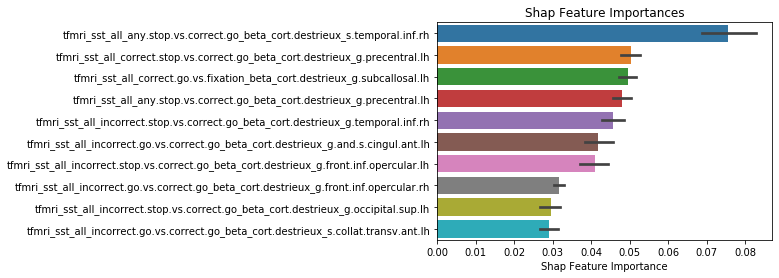

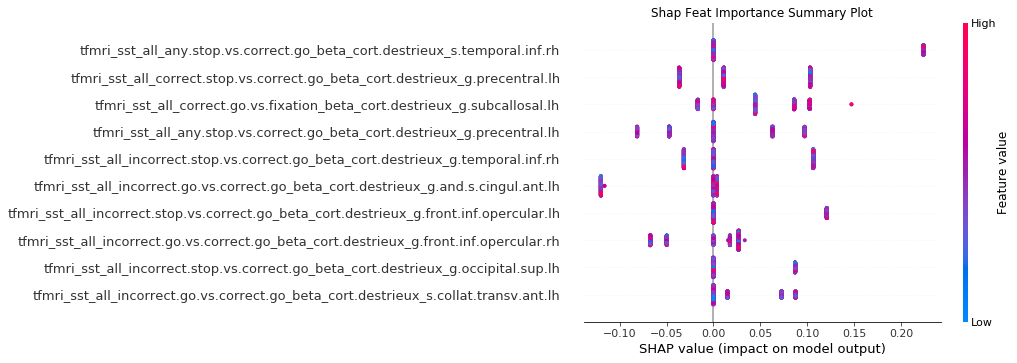

In [19]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 1,
                                    n_jobs=7,
                                    calc_shap_feature_importances = True,
                                    subjects_to_use = ('sex', 0))

ML.Plot_Base_Feat_Importances(top_n = 10)
ML.Plot_Shap_Feat_Importances(top_n = 10)
ML.Plot_Shap_Summary(top_n = 10)

Running Evaluate with:
problem_type = binary
model = light gbm
model_params = 1
metric = ['matthews', 'macro roc auc', 'balanced accuracy', 'f1']
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = univariate selection
feat_selector_params = 1
splits = 3
n_repeats = 2
search_type = random
search_splits = 3
search_n_iter = 50
n_jobs = 7
feats_to_use = _sst_
subjects_to_use = ('sex', 1)
compute_train_score = False
random_state = 1
calc_base_feature_importances = True
calc_shap_feature_importances = True
extra_params = {}

Saving scores and settings with unique name: light gbm0

subjects_to_use set to: sex=1,



/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Validation Scores
_________________
Metric:  matthews
Mean Validation score:  -0.005894966816494058
Macro Std in Validation score:  0.05764204010302601
Micro Std in Validation score:  0.07904412731728576

Metric:  macro roc auc
Mean Validation score:  0.5061562863660888
Macro Std in Validation score:  0.028332964868554605
Micro Std in Validation score:  0.04100259451047116

Metric:  balanced accuracy
Mean Validation score:  0.4967512532873981
Macro Std in Validation score:  0.02964661269998406
Micro Std in Validation score:  0.04066523340691316

Metric:  f1
Mean Validation score:  0.5054229869209405
Macro Std in Validation score:  0.16844246584739156
Micro Std in Validation score:  0.24698259219416052



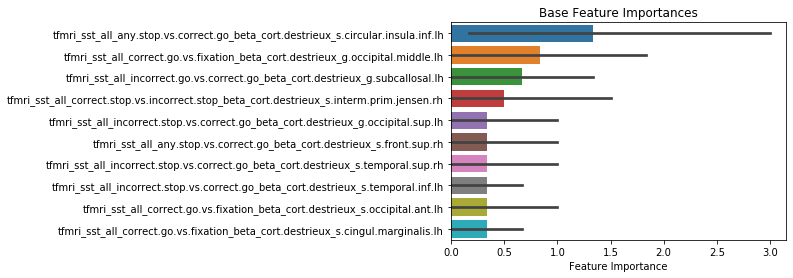

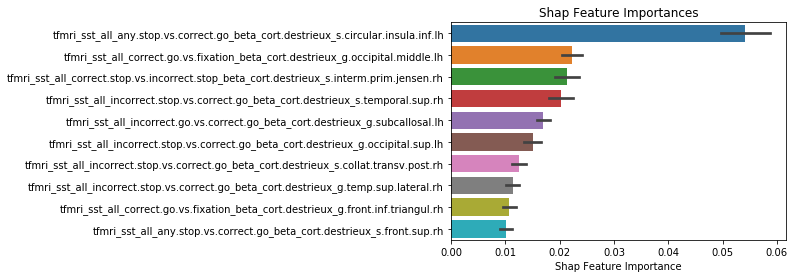

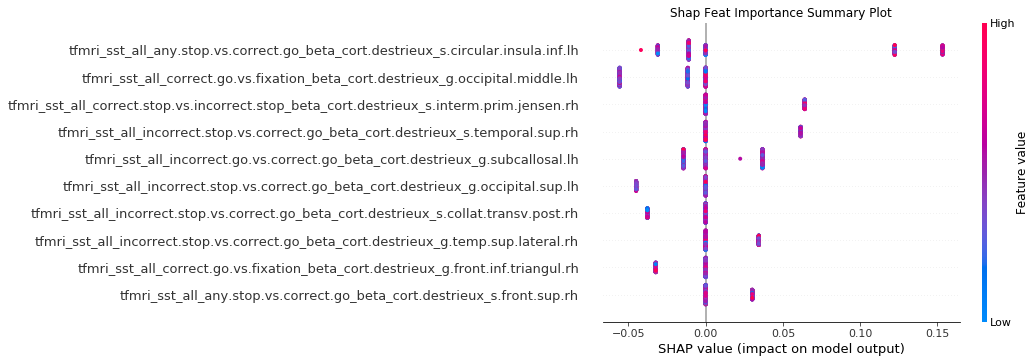

In [20]:
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    feat_selector = 'univariate selection',
                                    feat_selector_params = 1,
                                    n_jobs=7,
                                    calc_shap_feature_importances = True,
                                    subjects_to_use = ('sex', 1))

ML.Plot_Base_Feat_Importances(top_n = 10)
ML.Plot_Shap_Feat_Importances(top_n = 10)
ML.Plot_Shap_Summary(top_n = 10)